<a href="https://colab.research.google.com/github/ancestor9/Gyeongbok-AI-study/blob/main/In_Depth_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$$
\textbf{목표:} \\
f : \mathbb{R}^d \to \mathbb{R} \text{ 를 선택하여 새로운 } x \text{ 에 대한 } y \text{ 를 예측한다.}
$$

---
$$
\textbf{Basis Functions 정의:} \\
\phi : \mathbb{R}^d \to \mathbb{R}^m, \, \phi(x) = (\phi_1(x), \phi_2(x), \dots, \phi_m(x)) \\
\text{여기서 } \phi(x) \text{ 는 비선형 변환을 포함할 수 있음.}
$$
---

$$
\textbf{Identity:} \\
f(x) = \omega^T x = \sum_{i=1}^d \omega_i x(i)
$$

---

$$
\textbf{General:} \\
f(x) = \omega^T \phi(x) = \sum_{i=1}^m \omega_i \phi_i(x)
$$

---

In [10]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
xfit = np.linspace(0, 10, 50)
y = np.sin(x) + 0.1 * rng.randn(50)

# **Basis Function Regression**
## **1. Identity basis functions**

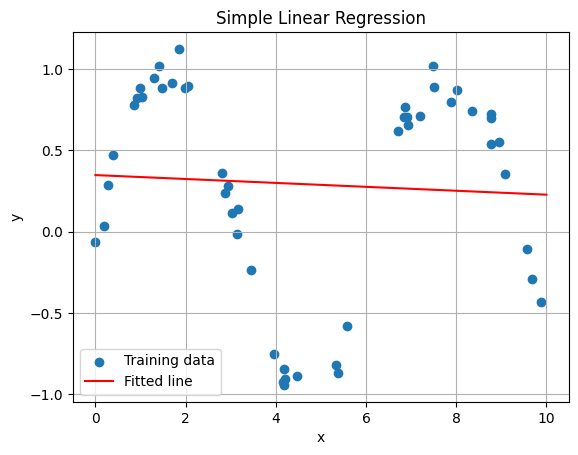

In [12]:
# prompt: x를 단순회귀분석으로 y를 예측하여 모델을 구하고 이 모델로 xfit(새로운데이터?)를 예측하여 y_fit를 구하고 x, xfit, y, yfit 를 시각화하라

# import numpy as np
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.linear_model import LinearRegression
# import matplotlib.pyplot as plt

# rng = np.random.RandomState(1)
# x = 10 * rng.rand(50)
# xfit = np.linspace(0, 10, 50)
# y = np.sin(x) + 0.1 * rng.randn(50)

# Simple Linear Regression
model = LinearRegression()
X = x.reshape(-1,1) # Reshape x to a 2D array for sklearn
model.fit(X,y)
y_fit = model.predict(xfit.reshape(-1,1))

# Visualization
# plt.figure(figsize=(10,6))
plt.scatter(x, y, label='Training data')
plt.plot(xfit, y_fit, label='Fitted line', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Simple Linear Regression')
plt.legend()
plt.grid(True)
plt.show()

## **2. General Function**
## **2.1. Polynomial basis functions**

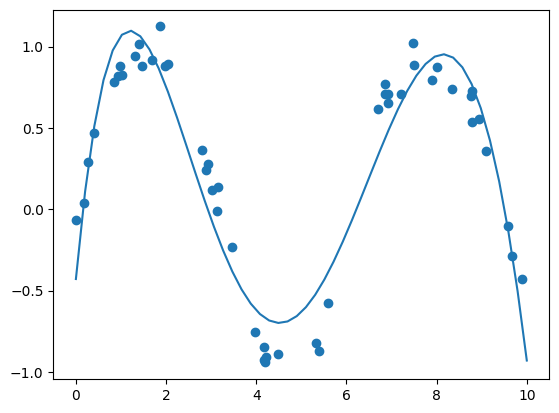

In [13]:

poly_model = make_pipeline(PolynomialFeatures(5),
                           LinearRegression())

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

In [17]:
# prompt: x, y, x_fit, yfit 을 데이터프레임으로 만들어줘. 단 PolynomialFeatures(5)를 적용한 입력변수를 포함해줘

import pandas as pd
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
xfit = np.linspace(0, 10, 50)
y = np.sin(x) + 0.1 * rng.randn(50)

# Polynomial Regression
poly_model = make_pipeline(PolynomialFeatures(5), LinearRegression())
poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

# Create PolynomialFeatures(5) input variables
poly = PolynomialFeatures(5)
x_poly = poly.fit_transform(x.reshape(-1,1))
xfit_poly = poly.transform(xfit.reshape(-1,1))

# Create DataFrame
df = pd.DataFrame({'x': x, 'y': y})
df_fit = pd.DataFrame({'x_fit': xfit, 'yfit': yfit})


# Concatenate dataframes
df = pd.concat([df, pd.DataFrame(x_poly)], axis = 1)
df_fit = pd.concat([df_fit, pd.DataFrame(xfit_poly)], axis = 1)
df_fit

,x_fit,yfit,0,1,2,3,4,5
0,0.000000,-0.429172,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.204082,0.108324,1.0,0.204082,0.041649,0.008500,0.001735,0.000354
2,0.408163,0.510065,1.0,0.408163,0.166597,0.067999,0.027755,0.011328
3,0.612245,0.793877,1.0,0.612245,0.374844,0.229496,0.140508,0.086025
4,0.816327,0.976337,1.0,0.816327,0.666389,0.543991,0.444074,0.362510
5,1.020408,1.072807,1.0,1.020408,1.041233,1.062482,1.084166,1.106292
6,1.224490,1.097473,1.0,1.224490,1.499375,1.835970,2.248126,2.752808
7,1.428571,1.063379,1.0,1.428571,2.040816,2.915452,4.164931,5.949902
8,1.632653,0.982463,1.0,1.632653,2.665556,4.351928,7.105189,11.600308
9,1.836735,0.865597,1.0,1.836735,3.373594,6.196398,11.381139,20.904132


## **2.2. Gaussian basis functions**

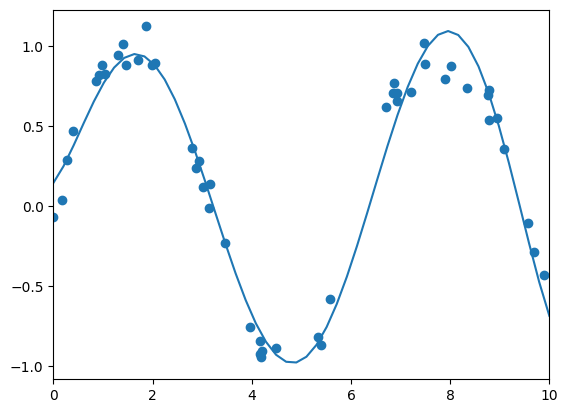

In [22]:
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Uniformly spaced Gaussian features for one-dimensional input"""

    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor

    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))

    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self

    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,
                                 self.width_, axis=1)

gauss_model = make_pipeline(GaussianFeatures(5),
                            LinearRegression())
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 10);

In [35]:
# Step 1: Generate input data
rng = np.random.default_rng(42)
x = 10 * rng.random(1000)
y = np.sin(x) + 0.1 * rng.normal(size=1000)

# Step 2: Define Gaussian basis function transformation
def gaussian_basis(x, centers, width):
    """
    Apply Gaussian basis transformation.
    x: input data
    centers: array of Gaussian centers
    width: standard deviation of the Gaussians
    """
    return np.exp(-0.5 * ((x[:, None] - centers) / width) ** 2)

# Step 3: Create Gaussian centers and width
N = 5  # Number of Gaussian centers
centers = np.linspace(x.min(), x.max(), N)
width = 2.0 * (centers[1] - centers[0])

# Step 4: Transform data
phi_x = gaussian_basis(x, centers, width)

# Step 5: Combine original x and transformed data for export
data = np.column_stack([x, phi_x])
columns = ['x'] + [f'phi_{i+1}' for i in range(N)]
df = pd.DataFrame(data, columns=columns)
df

,x,phi_1,phi_2,phi_3,phi_4,phi_5
0,7.739560,0.301405,0.576990,0.860227,0.998813,0.903195
1,4.388784,0.680653,0.931346,0.992483,0.823686,0.532385
2,8.585979,0.228453,0.476049,0.772564,0.976436,0.961123
3,6.973680,0.377817,0.669833,0.924865,0.994528,0.832878
4,0.941773,0.982799,0.951983,0.718158,0.421927,0.193055
...,...,...,...,...,...,...
995,4.379896,0.681716,0.931971,0.992265,0.822771,0.531321
996,6.390136,0.441754,0.738702,0.962020,0.975720,0.770713
997,0.023088,0.999998,0.883447,0.607838,0.325703,0.135920
998,9.933685,0.138474,0.330278,0.613504,0.887526,0.999934


In [36]:
df.columns

Index(['x', 'phi_1', 'phi_2', 'phi_3', 'phi_4', 'phi_5'], dtype='object')

<ipython-input-39-2fc44fd89845>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label=col,)  # Add kde for density estimation
<ipython-input-39-2fc44fd89845>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label=col,)  # Add kde for density estimation
<ipython-input-39-2fc4

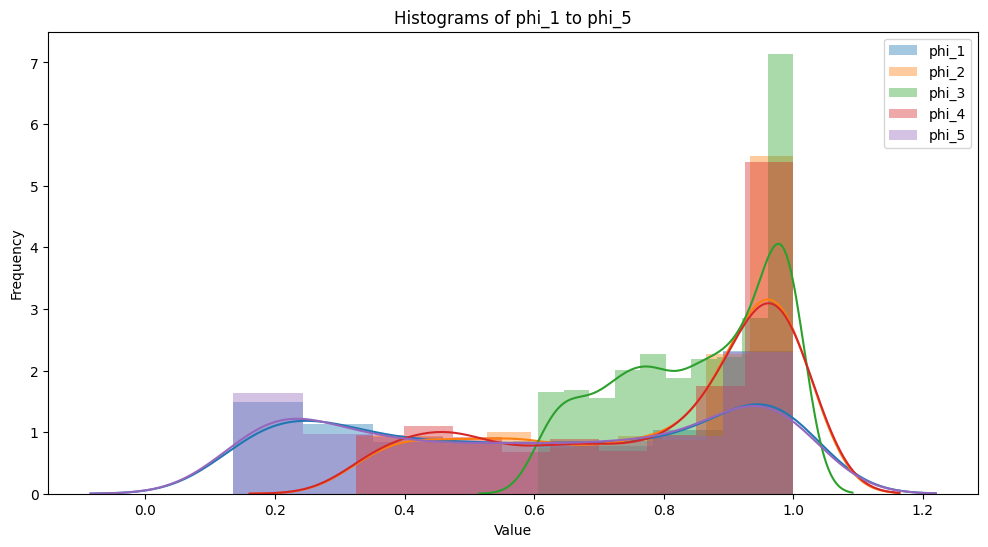

In [39]:
# prompt: 'phi_1', 'phi_2', 'phi_3', 'phi_4', 'phi_5'의 histogram을 seaborn으로 그려줘

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame from the previous code
# and it contains columns 'phi_1', 'phi_2', ..., 'phi_5'

phi_columns = ['phi_1', 'phi_2', 'phi_3', 'phi_4', 'phi_5']

plt.figure(figsize=(12, 6))  # Adjust figure size for better visualization
for col in phi_columns:
    sns.distplot(df[col], label=col,)  # Add kde for density estimation

plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histograms of phi_1 to phi_5")
plt.legend()
plt.show()

In [32]:
df[:20]['x'].var()

8.095707112861728